In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv("./R02_Data.csv")

# Display basic information about the dataset
print(data.info())
print(data.head())

C:\Users\Alireza Vaezi\AppData\Local\Temp\ipykernel_16004\978901404.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./R02_Data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974836 entries, 0 to 974835
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _time                     974836 non-null  object 
 1   I_R02_Gripper_Load        974836 non-null  int64  
 2   I_R02_Gripper_Pot         974836 non-null  int64  
 3   M_R02_BJointAngle_Degree  974836 non-null  float64
 4   M_R02_LJointAngle_Degree  974836 non-null  float64
 5   M_R02_RJointAngle_Degree  974836 non-null  float64
 6   M_R02_SJointAngle_Degree  974836 non-null  float64
 7   M_R02_TJointAngle_Degree  974836 non-null  float64
 8   M_R02_UJointAngle_Degree  974836 non-null  float64
 9   Description               492728 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 74.4+ MB
None
                      _time  I_R02_Gripper_Load  I_R02_Gripper_Pot  \
0  2023-12-11T13:04:12.348Z                1299              11695   
1  2023-1

In [4]:
# Convert `_time` to datetime for time-based analysis
data["_time"] = pd.to_datetime(data["_time"], errors="coerce")

Descriptive Statistics for I_R02_Gripper_Load:
count    974836.00000
mean       1306.58103
std          15.91377
min        1147.00000
25%        1296.00000
50%        1307.00000
75%        1317.00000
max        1474.00000
Name: I_R02_Gripper_Load, dtype: float64

Descriptive Statistics for I_R02_Gripper_Pot:
count    974836.000000
mean      10895.532439
std        2123.800414
min        2001.000000
25%       11601.000000
50%       11642.000000
75%       11680.000000
max       11998.000000
Name: I_R02_Gripper_Pot, dtype: float64


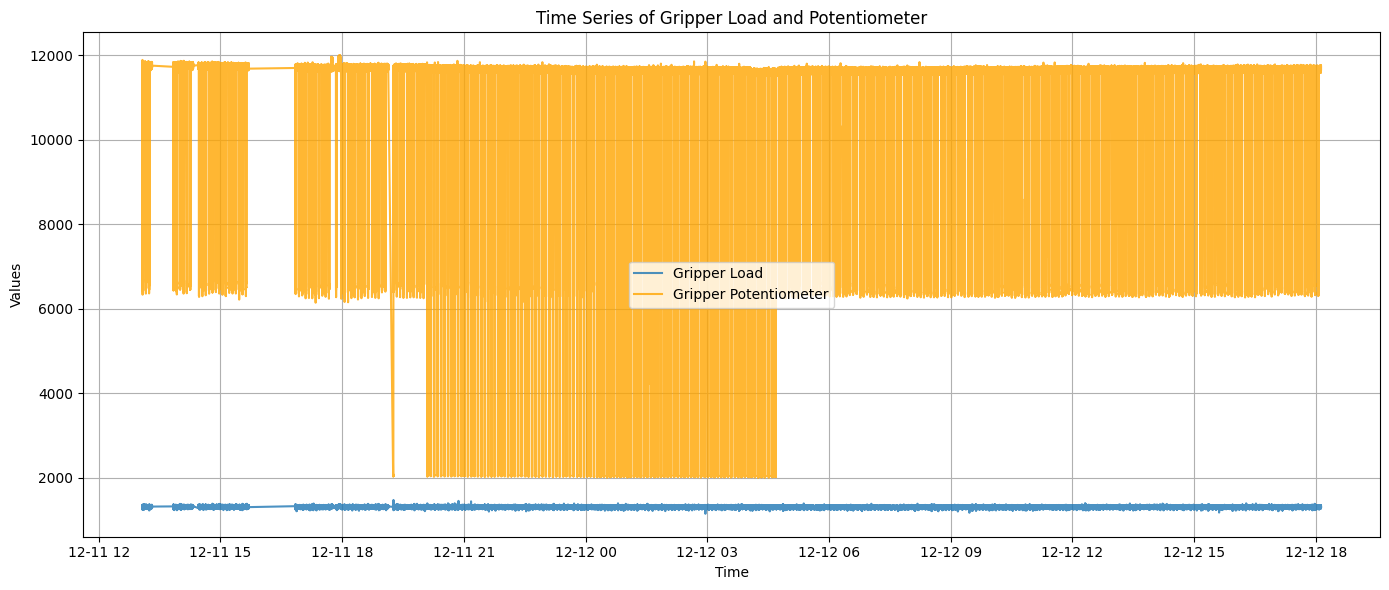

In [7]:
# Remove timezone information from `_time`
data["_time"] = data["_time"].dt.tz_localize(None)

# Display descriptive statistics for key columns
print("Descriptive Statistics for I_R02_Gripper_Load:")
print(data["I_R02_Gripper_Load"].describe())

print("\nDescriptive Statistics for I_R02_Gripper_Pot:")
print(data["I_R02_Gripper_Pot"].describe())

# Plot time-series data for Gripper Load and Potentiometer
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot Gripper Load over time
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.8)

# Plot Gripper Potentiometer over time
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.8, color="orange")

# Add labels and title
plt.title("Time Series of Gripper Load and Potentiometer")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Calculate SPC metrics for Gripper Load
mean_load = data["I_R02_Gripper_Load"].mean()
std_load = data["I_R02_Gripper_Load"].std()
ucl = mean_load + 3 * std_load  # Upper Control Limit
lcl = mean_load - 3 * std_load  # Lower Control Limit

# Display SPC metrics
print("SPC Metrics for Gripper Load:")
print(f"Mean: {mean_load}")
print(f"Standard Deviation: {std_load}")
print(f"UCL (3σ): {ucl}")
print(f"LCL (3σ): {lcl}")

SPC Metrics for Gripper Load:
Mean: 1306.5810300399246
Standard Deviation: 15.91377027608616
UCL (3σ): 1354.3223408681831
LCL (3σ): 1258.839719211666


In [9]:
# Flag anomalies outside the control limits
data["Load_Anomaly"] = (data["I_R02_Gripper_Load"] > ucl) | (data["I_R02_Gripper_Load"] < lcl)

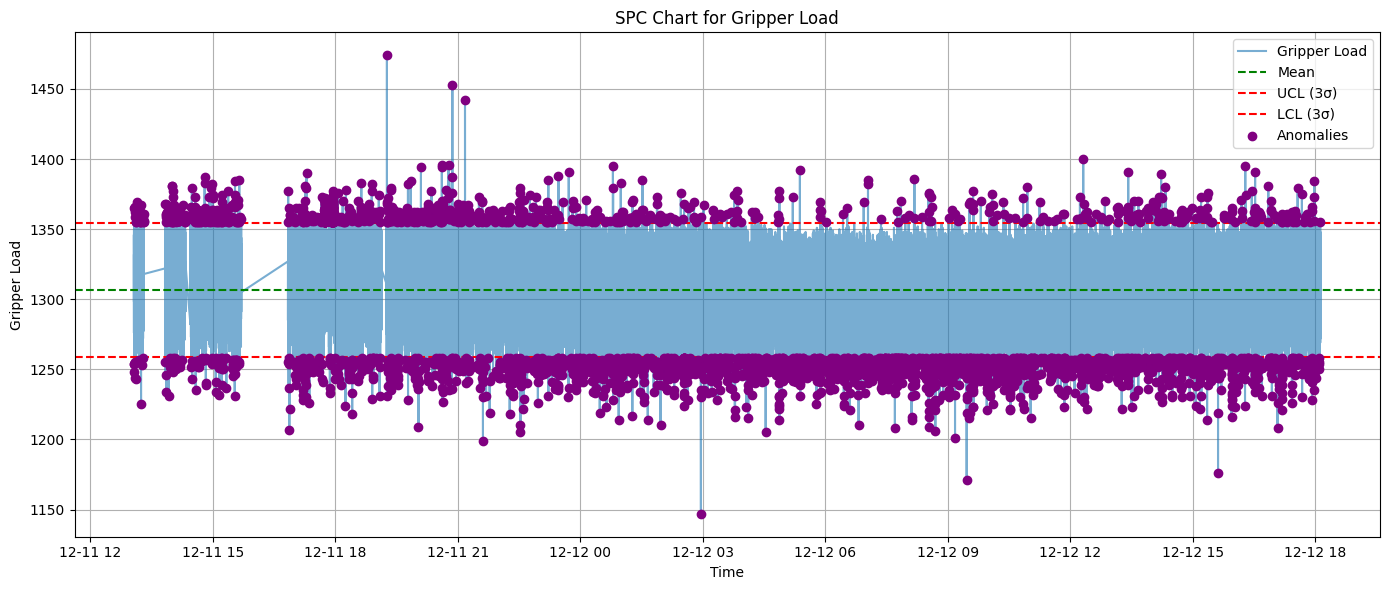

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot Gripper Load over time
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.6)

# Plot control limits and mean
plt.axhline(mean_load, color="green", linestyle="--", label="Mean")
plt.axhline(ucl, color="red", linestyle="--", label="UCL (3σ)")
plt.axhline(lcl, color="red", linestyle="--", label="LCL (3σ)")

# Highlight anomalies
anomalies = data[data["Load_Anomaly"]]
plt.scatter(anomalies["_time"], anomalies["I_R02_Gripper_Load"], color="purple", label="Anomalies", zorder=5)

# Add labels and title
plt.title("SPC Chart for Gripper Load")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Calculate SPC metrics for Gripper Potentiometer
mean_pot = data["I_R02_Gripper_Pot"].mean()
std_pot = data["I_R02_Gripper_Pot"].std()
ucl_pot = mean_pot + 3 * std_pot  # Upper Control Limit
lcl_pot = mean_pot - 3 * std_pot  # Lower Control Limit

# Display SPC metrics
print("SPC Metrics for Gripper Potentiometer:")
print(f"Mean: {mean_pot}")
print(f"Standard Deviation: {std_pot}")
print(f"UCL (3σ): {ucl_pot}")
print(f"LCL (3σ): {lcl_pot}")

SPC Metrics for Gripper Potentiometer:
Mean: 10895.532439302611
Standard Deviation: 2123.800414281599
UCL (3σ): 17266.933682147406
LCL (3σ): 4524.131196457814


In [12]:
# Flag anomalies for potentiometer values outside statistical control limits
data["Pot_Anomaly"] = (data["I_R02_Gripper_Pot"] > ucl_pot) | (data["I_R02_Gripper_Pot"] < lcl_pot)

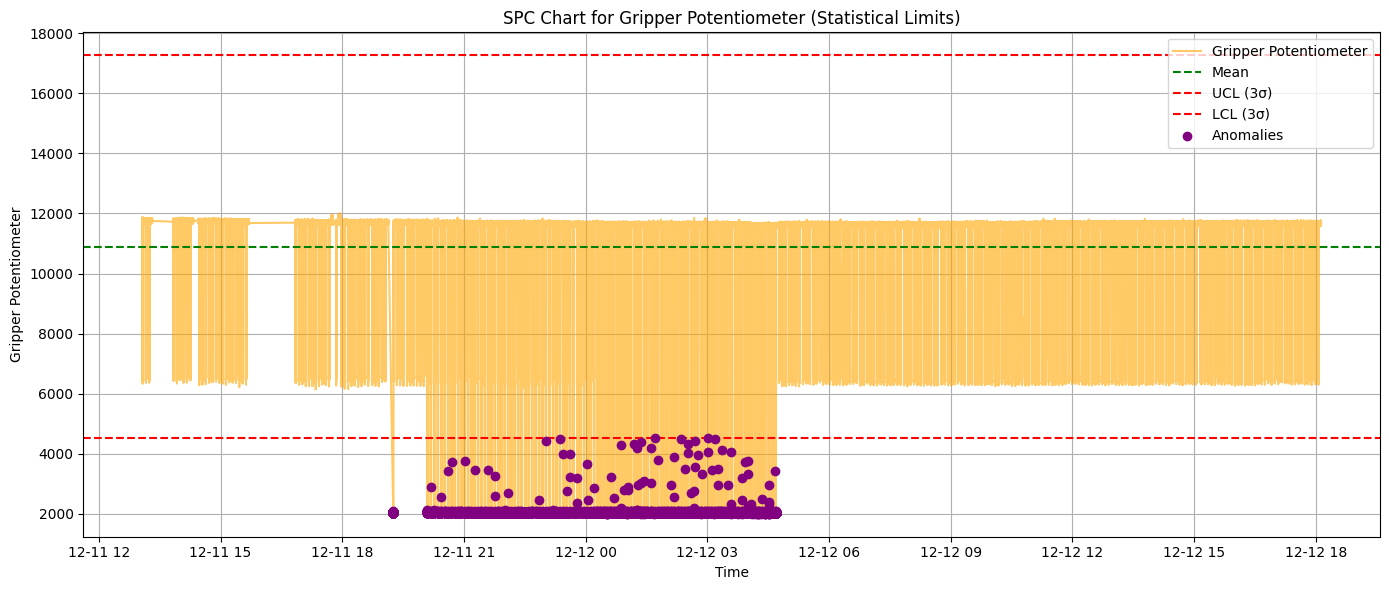

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot Gripper Potentiometer over time
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.6, color="orange")

# Plot control limits and mean
plt.axhline(mean_pot, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_pot, color="red", linestyle="--", label="UCL (3σ)")
plt.axhline(lcl_pot, color="red", linestyle="--", label="LCL (3σ)")

# Highlight anomalies
pot_anomalies = data[data["Pot_Anomaly"]]
plt.scatter(pot_anomalies["_time"], pot_anomalies["I_R02_Gripper_Pot"], color="purple", label="Anomalies", zorder=5)

# Add labels and title
plt.title("SPC Chart for Gripper Potentiometer (Statistical Limits)")
plt.xlabel("Time")
plt.ylabel("Gripper Potentiometer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering
X = data[["I_R02_Gripper_Load", "I_R02_Gripper_Pot"]]

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Display cluster centers for interpretation
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 1306.22778722 11653.43857174]
 [ 1308.82823057  6487.16295006]
 [ 1310.02789054  2047.36069764]]


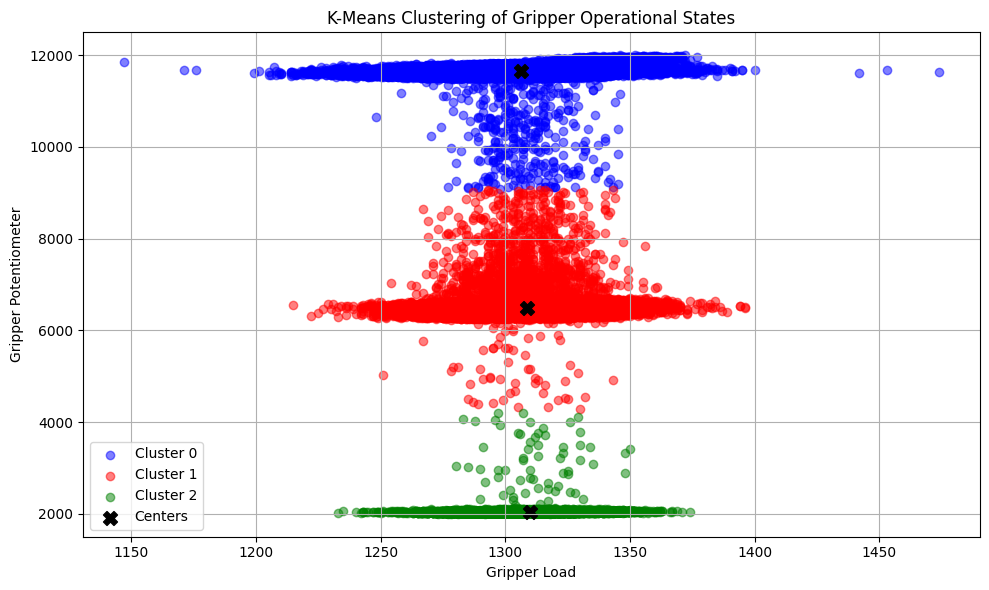

In [15]:
import matplotlib.pyplot as plt

# Define colors for the clusters
colors = ["blue", "red", "green"]  # Customize as needed for each cluster

plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(3):
    cluster_data = data[data["Cluster"] == i]
    plt.scatter(cluster_data["I_R02_Gripper_Load"], cluster_data["I_R02_Gripper_Pot"], label=f"Cluster {i}", alpha=0.5, color=colors[i])

# Plot cluster centers for reference
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color="black", marker="X", s=100, label="Centers")

# Add labels and title
plt.xlabel("Gripper Load")
plt.ylabel("Gripper Potentiometer")
plt.title("K-Means Clustering of Gripper Operational States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# SPC Metrics for Gripper Load
mean_load = 1306.58103
std_load = 15.91377
ucl_load = 1354.32234
lcl_load = 1258.83972
anomaly_count_load = data["Load_Anomaly"].sum()

# SPC Metrics for Gripper Potentiometer
mean_pot = 10895.532439
std_pot = 2123.800414
ucl_pot = 17266.933682
lcl_pot = 4524.131196
anomaly_count_pot = data["Pot_Anomaly"].sum()

# Create DataFrame for SPC Summary Table
spc_table = pd.DataFrame({"Metric": ["Mean", "Standard Deviation", "UCL (3σ)", "LCL (3σ)", "Anomaly Count"], "Gripper Load": [mean_load, std_load, ucl_load, lcl_load, anomaly_count_load], "Gripper Potentiometer": [mean_pot, std_pot, ucl_pot, lcl_pot, anomaly_count_pot]})

# Display SPC Summary Table
print("SPC Summary Table:")
print(spc_table.to_markdown(index=False))  # Use .to_latex() for LaTeX output

SPC Summary Table:
| Metric             |   Gripper Load |   Gripper Potentiometer |
|:-------------------|---------------:|------------------------:|
| Mean               |      1306.58   |                10895.5  |
| Standard Deviation |        15.9138 |                 2123.8  |
| UCL (3σ)           |      1354.32   |                17266.9  |
| LCL (3σ)           |      1258.84   |                 4524.13 |
| Anomaly Count      |      3755      |                26615    |


In [17]:
# Cluster centers from your K-Means results
cluster_centers = [[1306.22778722, 11653.43857174], [1308.82823057, 6487.16295006], [1310.02789054, 2047.36069764]]

# Create DataFrame for Clustering Summary Table
cluster_table = pd.DataFrame({"Cluster ID": [0, 1, 2], "Gripper Load Center": [center[0] for center in cluster_centers], "Gripper Potentiometer Center": [center[1] for center in cluster_centers], "Interpretation": ["Normal or High State", "Transitional State", "Anomalous Low State"]})

# Display Clustering Summary Table
print("\nClustering Summary Table:")
print(cluster_table.to_markdown(index=False))  # Use .to_latex() for LaTeX output


Clustering Summary Table:
|   Cluster ID |   Gripper Load Center |   Gripper Potentiometer Center | Interpretation       |
|-------------:|----------------------:|-------------------------------:|:---------------------|
|            0 |               1306.23 |                       11653.4  | Normal or High State |
|            1 |               1308.83 |                        6487.16 | Transitional State   |
|            2 |               1310.03 |                        2047.36 | Anomalous Low State  |


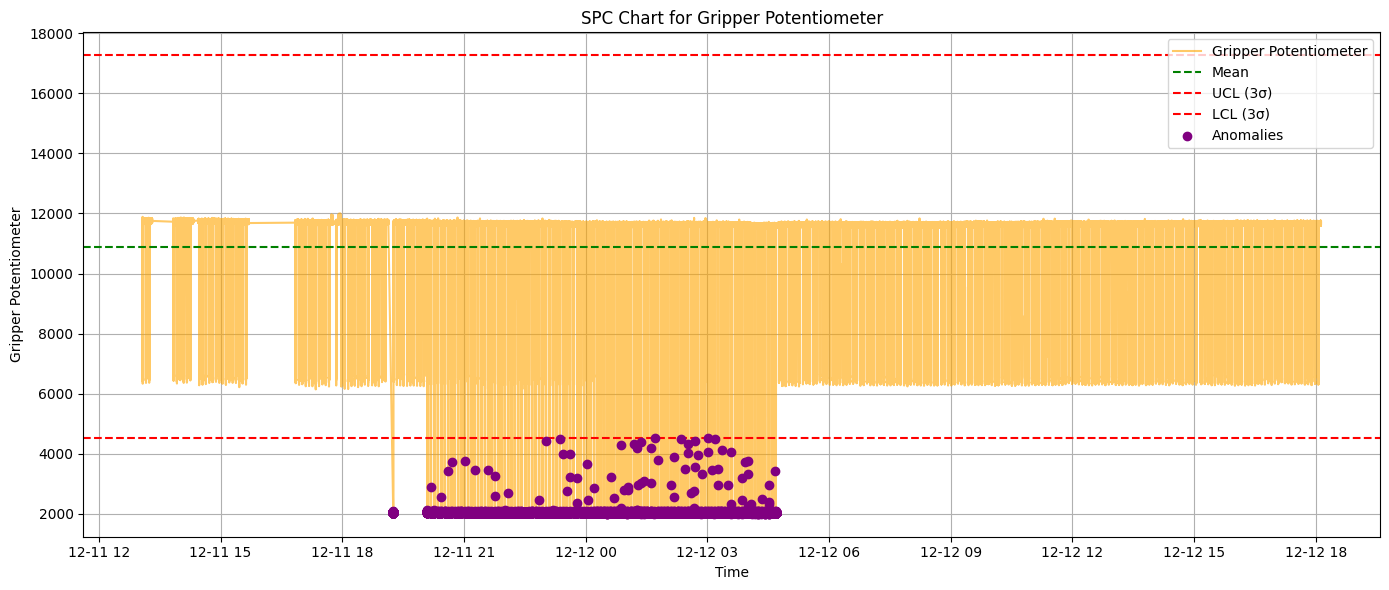

In [19]:
plt.figure(figsize=(14, 6))

# Plot Gripper Potentiometer over time
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.6, color="orange")

# Plot control limits and mean
plt.axhline(mean_pot, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_pot, color="red", linestyle="--", label="UCL (3σ)")
plt.axhline(lcl_pot, color="red", linestyle="--", label="LCL (3σ)")

# Highlight anomalies
pot_anomalies = data[data["Pot_Anomaly"]]
plt.scatter(pot_anomalies["_time"], pot_anomalies["I_R02_Gripper_Pot"], color="purple", label="Anomalies", zorder=5)

# Add labels and title
plt.title("SPC Chart for Gripper Potentiometer")
plt.xlabel("Time")
plt.ylabel("Gripper Potentiometer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Calculate 2-sigma limits for Gripper Load
mean_load = data["I_R02_Gripper_Load"].mean()
std_load = data["I_R02_Gripper_Load"].std()
ucl_load_2sigma = mean_load + 2 * std_load
lcl_load_2sigma = mean_load - 2 * std_load

# Calculate 2-sigma limits for Gripper Potentiometer
mean_pot = data["I_R02_Gripper_Pot"].mean()
std_pot = data["I_R02_Gripper_Pot"].std()
ucl_pot_2sigma = mean_pot + 2 * std_pot
lcl_pot_2sigma = mean_pot - 2 * std_pot

# Display the calculated 2-sigma limits
print("2-Sigma Control Limits for Gripper Load:")
print(f"UCL (2σ): {ucl_load_2sigma}")
print(f"LCL (2σ): {lcl_load_2sigma}\n")

print("2-Sigma Control Limits for Gripper Potentiometer:")
print(f"UCL (2σ): {ucl_pot_2sigma}")
print(f"LCL (2σ): {lcl_pot_2sigma}")

2-Sigma Control Limits for Gripper Load:
UCL (2σ): 1338.408570592097
LCL (2σ): 1274.7534894877522

2-Sigma Control Limits for Gripper Potentiometer:
UCL (2σ): 15143.13326786581
LCL (2σ): 6647.931610739413


In [21]:
# Flag anomalies for Gripper Load based on 2-sigma limits
data["Load_Anomaly_2sigma"] = (data["I_R02_Gripper_Load"] > ucl_load_2sigma) | (data["I_R02_Gripper_Load"] < lcl_load_2sigma)

# Flag anomalies for Gripper Potentiometer based on 2-sigma limits
data["Pot_Anomaly_2sigma"] = (data["I_R02_Gripper_Pot"] > ucl_pot_2sigma) | (data["I_R02_Gripper_Pot"] < lcl_pot_2sigma)

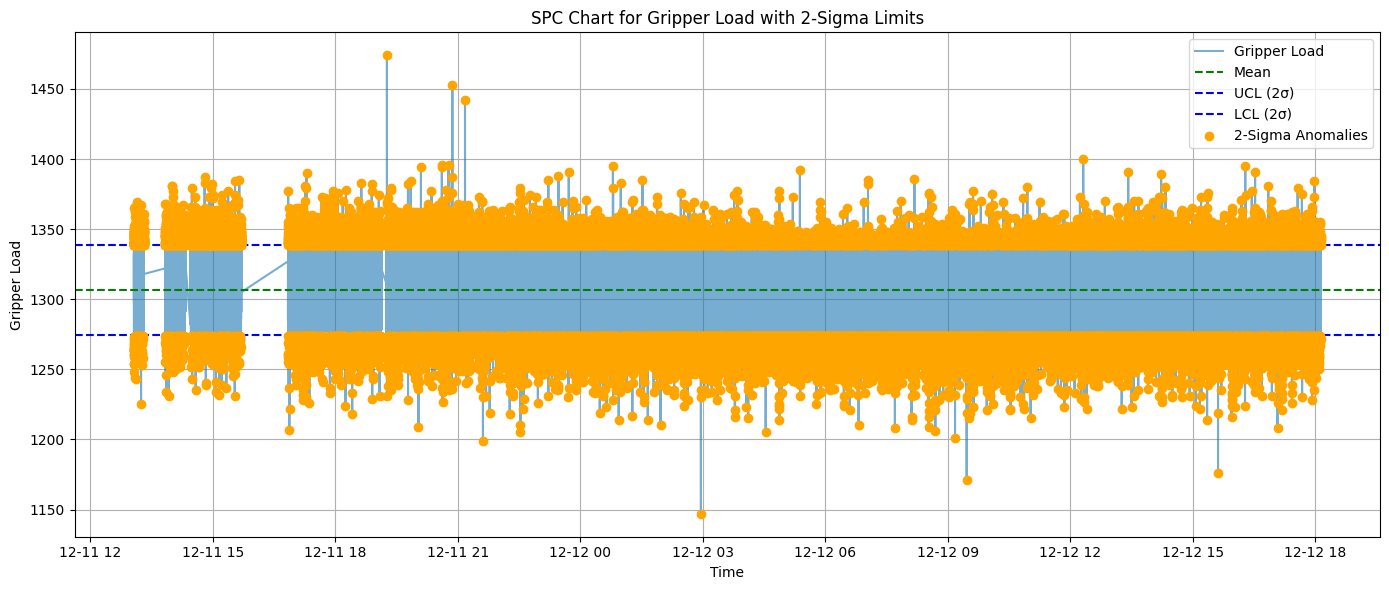

In [22]:
plt.figure(figsize=(14, 6))

# Plot Gripper Load over time
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.6)

# Plot 2-sigma control limits
plt.axhline(mean_load, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_load_2sigma, color="blue", linestyle="--", label="UCL (2σ)")
plt.axhline(lcl_load_2sigma, color="blue", linestyle="--", label="LCL (2σ)")

# Highlight 2-sigma anomalies
load_anomalies_2sigma = data[data["Load_Anomaly_2sigma"]]
plt.scatter(load_anomalies_2sigma["_time"], load_anomalies_2sigma["I_R02_Gripper_Load"], color="orange", label="2-Sigma Anomalies", zorder=5)

# Add labels and title
plt.title("SPC Chart for Gripper Load with 2-Sigma Limits")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

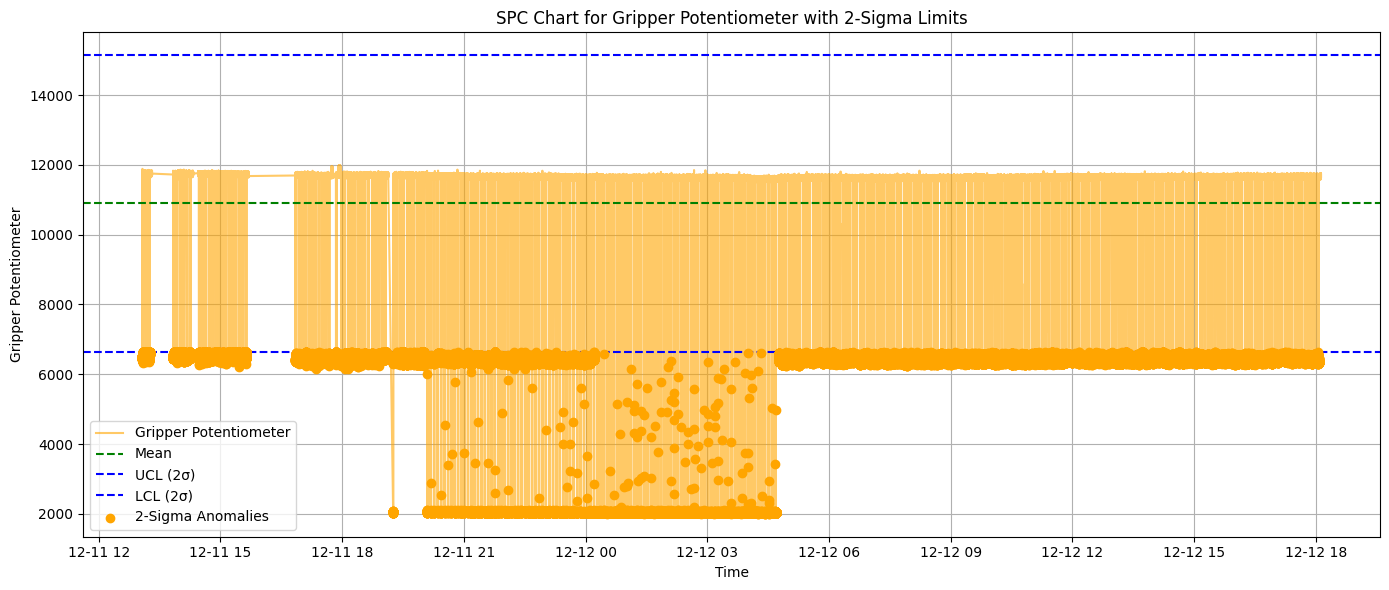

In [23]:
plt.figure(figsize=(14, 6))

# Plot Gripper Potentiometer over time
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.6, color="orange")

# Plot 2-sigma control limits
plt.axhline(mean_pot, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_pot_2sigma, color="blue", linestyle="--", label="UCL (2σ)")
plt.axhline(lcl_pot_2sigma, color="blue", linestyle="--", label="LCL (2σ)")

# Highlight 2-sigma anomalies
pot_anomalies_2sigma = data[data["Pot_Anomaly_2sigma"]]
plt.scatter(pot_anomalies_2sigma["_time"], pot_anomalies_2sigma["I_R02_Gripper_Pot"], color="orange", label="2-Sigma Anomalies", zorder=5)

# Add labels and title
plt.title("SPC Chart for Gripper Potentiometer with 2-Sigma Limits")
plt.xlabel("Time")
plt.ylabel("Gripper Potentiometer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate rate of change (slopes) for Gripper Load and Potentiometer
data["Gripper_Load_Slope"] = data["I_R02_Gripper_Load"].diff() / data["_time"].diff().dt.total_seconds()
data["Gripper_Pot_Slope"] = data["I_R02_Gripper_Pot"].diff() / data["_time"].diff().dt.total_seconds()

# Display basic statistics for slopes
print("Gripper Load Slope Statistics:")
print(data["Gripper_Load_Slope"].describe())

print("\nGripper Potentiometer Slope Statistics:")
print(data["Gripper_Pot_Slope"].describe())

Gripper Load Slope Statistics:
count    974423.000000
mean          2.094936
std        4272.242727
min     -113000.000000
25%        -151.260504
50%           0.000000
75%         151.515152
max      111000.000000
Name: Gripper_Load_Slope, dtype: float64

Gripper Potentiometer Slope Statistics:
count    9.744230e+05
mean     4.291534e+00
std      6.635224e+04
min     -9.598000e+06
25%     -3.473684e+02
50%      0.000000e+00
75%      3.434343e+02
max      9.592000e+06
Name: Gripper_Pot_Slope, dtype: float64


In [25]:
from scipy.signal import find_peaks

# Detect peaks and dips in Gripper Load
load_peaks, _ = find_peaks(data["I_R02_Gripper_Load"])
load_dips, _ = find_peaks(-data["I_R02_Gripper_Load"])

# Detect peaks and dips in Gripper Potentiometer
pot_peaks, _ = find_peaks(data["I_R02_Gripper_Pot"])
pot_dips, _ = find_peaks(-data["I_R02_Gripper_Pot"])

# Add peaks and dips to data for visualization
data["Load_Peak"] = 0
data["Load_Dip"] = 0
data.loc[load_peaks, "Load_Peak"] = data.loc[load_peaks, "I_R02_Gripper_Load"]
data.loc[load_dips, "Load_Dip"] = data.loc[load_dips, "I_R02_Gripper_Load"]

data["Pot_Peak"] = 0
data["Pot_Dip"] = 0
data.loc[pot_peaks, "Pot_Peak"] = data.loc[pot_peaks, "I_R02_Gripper_Pot"]
data.loc[pot_dips, "Pot_Dip"] = data.loc[pot_dips, "I_R02_Gripper_Pot"]

# Summary of peak and dip frequency
print(f"Gripper Load Peaks: {len(load_peaks)}, Dips: {len(load_dips)}")
print(f"Gripper Potentiometer Peaks: {len(pot_peaks)}, Dips: {len(pot_dips)}")

Gripper Load Peaks: 320517, Dips: 320517
Gripper Potentiometer Peaks: 322378, Dips: 322377


C:\Users\Alireza Vaezi\AppData\Local\Temp\ipykernel_16004\528775384.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Alireza Vaezi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


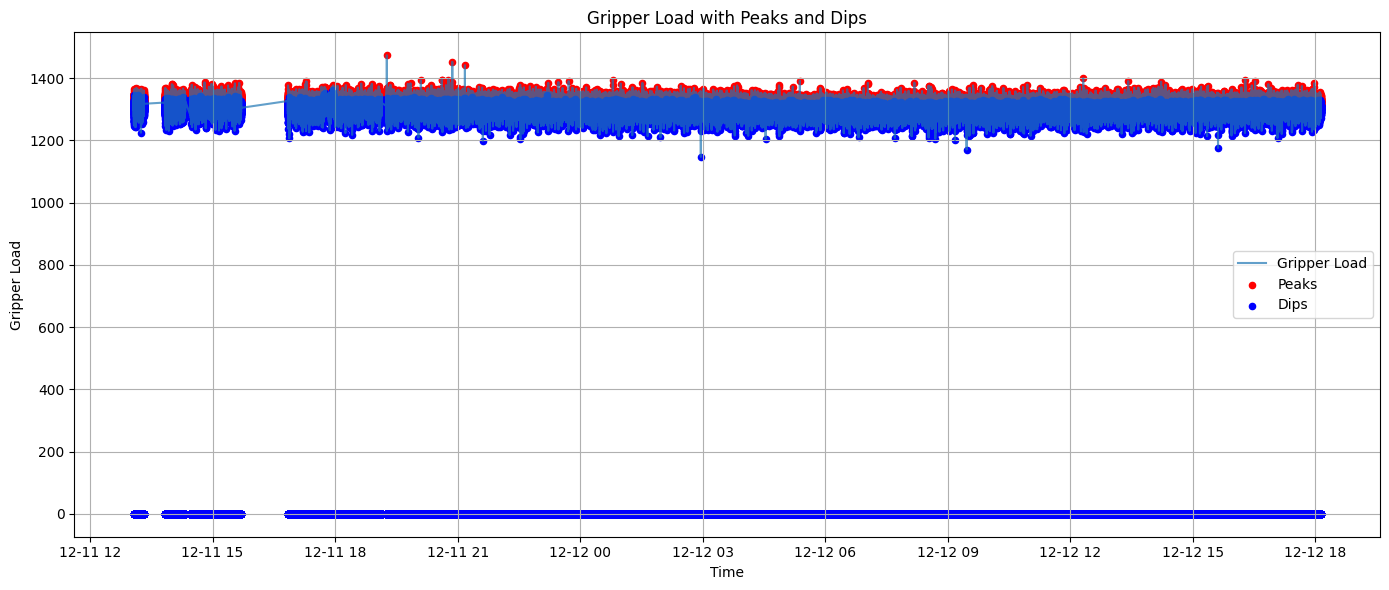

In [26]:
plt.figure(figsize=(14, 6))

# Plot Gripper Load with Peaks and Dips
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.7)
plt.scatter(data["_time"], data["Load_Peak"], color="red", label="Peaks", s=20)
plt.scatter(data["_time"], data["Load_Dip"], color="blue", label="Dips", s=20)
plt.title("Gripper Load with Peaks and Dips")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Define specification limits (adjust based on domain knowledge or operational tolerance)
usl_load = 1350  # Upper Specification Limit for Gripper Load
lsl_load = 1250  # Lower Specification Limit for Gripper Load

usl_pot = 12000  # Upper Specification Limit for Gripper Potentiometer
lsl_pot = 2000  # Lower Specification Limit for Gripper Potentiometer

# Calculate Cp and Cpk for Gripper Load
cp_load = (usl_load - lsl_load) / (6 * std_load)
cpk_load = min((usl_load - mean_load) / (3 * std_load), (mean_load - lsl_load) / (3 * std_load))

# Calculate Cp and Cpk for Gripper Potentiometer
cp_pot = (usl_pot - lsl_pot) / (6 * std_pot)
cpk_pot = min((usl_pot - mean_pot) / (3 * std_pot), (mean_pot - lsl_pot) / (3 * std_pot))

# Display Cp and Cpk results
print(f"Process Capability for Gripper Load: Cp = {cp_load:.2f}, Cpk = {cpk_load:.2f}")
print(f"Process Capability for Gripper Potentiometer: Cp = {cp_pot:.2f}, Cpk = {cpk_pot:.2f}")

Process Capability for Gripper Load: Cp = 1.05, Cpk = 0.91
Process Capability for Gripper Potentiometer: Cp = 0.78, Cpk = 0.17


In [ ]:
import pandas as pd

# Functional Descriptors Table
functional_descriptors_data = {"Metric": ["Mean Slope", "Standard Deviation (Slope)", "Min Slope", "Max Slope", "Peak Count", "Dip Count"], "Gripper Load": [2.09, 4272.24, -113000, 111000, 320517, 320517], "Gripper Potentiometer": [4.29, 66352.24, -9598000, 9592000, 322378, 322377]}

functional_descriptors_df = pd.DataFrame(functional_descriptors_data)
print("Functional Descriptors Table:")
display(functional_descriptors_df)  # This will display nicely in Jupyter/VS Code

# Process Capability Table
process_capability_data = {"Metric": ["Cp (Process Capability)", "Cpk (Centered Capability)"], "Gripper Load": [1.05, 0.91], "Gripper Potentiometer": [0.78, 0.17]}

process_capability_df = pd.DataFrame(process_capability_data)
print("\nProcess Capability Table:")
display(process_capability_df)

Functional Descriptors Table:


,Metric,Gripper Load,Gripper Potentiometer
0,Mean Slope,2.09,4.29
1,Standard Deviation (Slope),4272.24,66352.24
2,Min Slope,-113000.00,-9598000.00
3,Max Slope,111000.00,9592000.00
4,Peak Count,320517.00,322378.00
5,Dip Count,320517.00,322377.00



Process Capability Table:


,Metric,Gripper Load,Gripper Potentiometer
0,Cp (Process Capability),1.05,0.78
1,Cpk (Centered Capability),0.91,0.17



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 2.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.9 MB 3.1 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.9 MB 3.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 3.5 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 5.5 MB/s eta 0:00:00


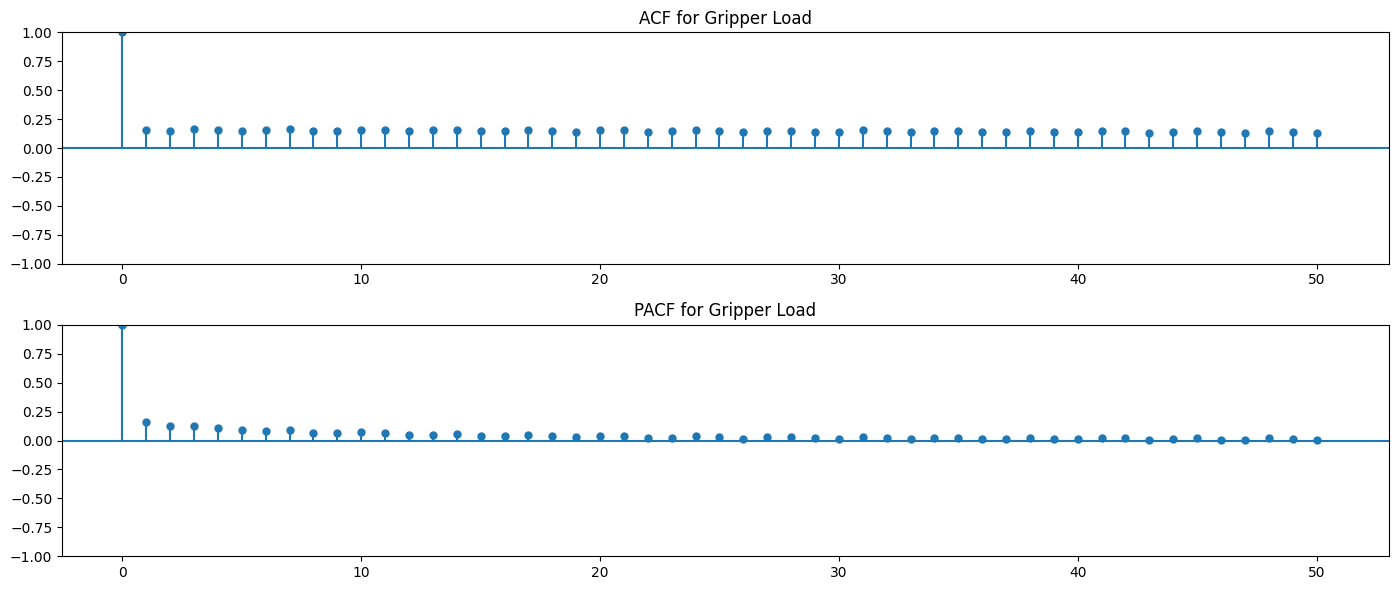

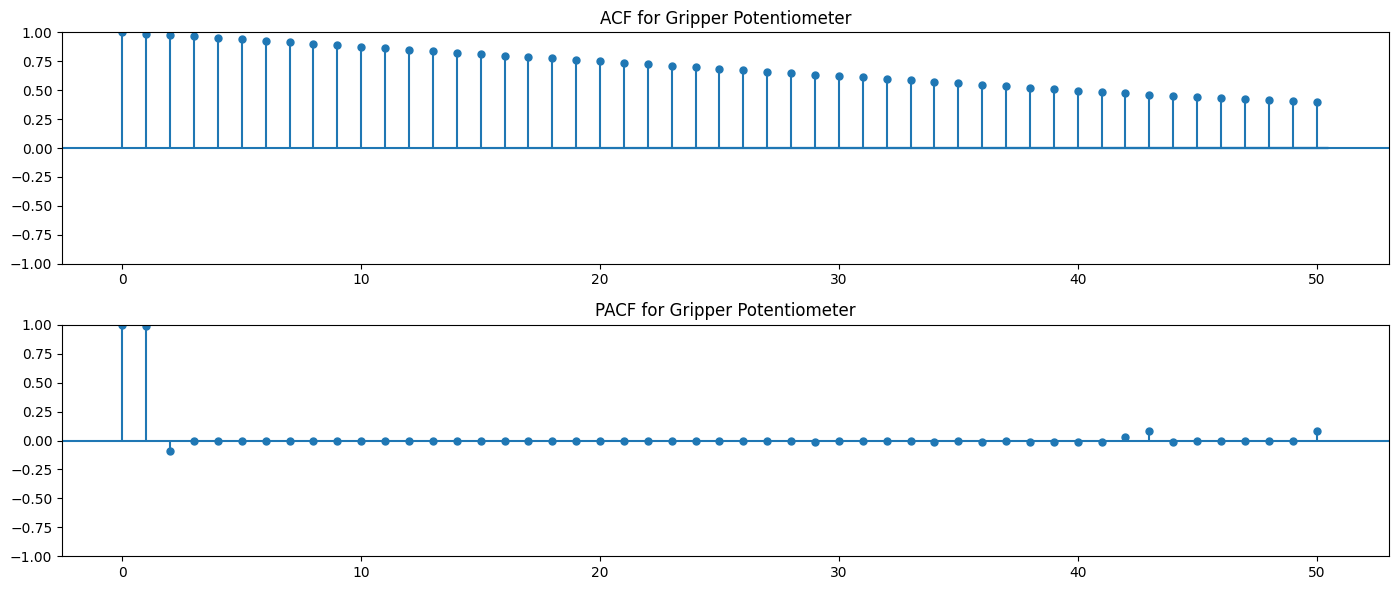

In [30]:
%pip install statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for Gripper Load
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(data["I_R02_Gripper_Load"], lags=50, ax=plt.gca(), title="ACF for Gripper Load")
plt.subplot(2, 1, 2)
plot_pacf(data["I_R02_Gripper_Load"], lags=50, ax=plt.gca(), title="PACF for Gripper Load")
plt.tight_layout()
plt.show()

# Plot ACF and PACF for Gripper Potentiometer
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(data["I_R02_Gripper_Pot"], lags=50, ax=plt.gca(), title="ACF for Gripper Potentiometer")
plt.subplot(2, 1, 2)
plot_pacf(data["I_R02_Gripper_Pot"], lags=50, ax=plt.gca(), title="PACF for Gripper Potentiometer")
plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns for combined analysis
features = ["I_R02_Gripper_Load", "I_R02_Gripper_Pot", "M_R02_BJointAngle_Degree", "M_R02_LJointAngle_Degree", "M_R02_RJointAngle_Degree", "M_R02_SJointAngle_Degree", "M_R02_TJointAngle_Degree", "M_R02_UJointAngle_Degree"]

# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[features])

# Convert back to DataFrame for easy visualization
normalized_df = pd.DataFrame(normalized_data, columns=features)
print("Normalized Data Head:")
print(normalized_df.head())

Normalized Data Head:
   I_R02_Gripper_Load  I_R02_Gripper_Pot  M_R02_BJointAngle_Degree  \
0           -0.476382           0.376433                  0.482858   
1            0.591876           0.431523                  0.482858   
2            0.152005           0.377845                  0.482858   
3            0.843231           0.415043                  0.482858   
4            0.466198           0.408922                  0.482858   

   M_R02_LJointAngle_Degree  M_R02_RJointAngle_Degree  \
0                 -0.484432                   0.28339   
1                 -0.484432                   0.28339   
2                 -0.484432                   0.28339   
3                 -0.484432                   0.28339   
4                 -0.484432                   0.28339   

   M_R02_SJointAngle_Degree  M_R02_TJointAngle_Degree  \
0                   0.24275                  0.455115   
1                   0.24275                  0.455115   
2                   0.24275                

In [33]:
# Add Anomaly labels based on 3-sigma limits for Gripper Load and Potentiometer
data["Anomaly"] = 0  # Initialize all as normal (0)

# Label as anomaly if outside 3-sigma limits for Gripper Load
data.loc[(data["I_R02_Gripper_Load"] > 1354.32) | (data["I_R02_Gripper_Load"] < 1258.84), "Anomaly"] = 1

# Label as anomaly if outside 3-sigma limits for Gripper Potentiometer
data.loc[(data["I_R02_Gripper_Pot"] > 17266.93) | (data["I_R02_Gripper_Pot"] < 4524.13), "Anomaly"] = 1

# Confirm labels
print("Anomaly Label Distribution:\n", data["Anomaly"].value_counts())

Anomaly Label Distribution:
 Anomaly
0    944531
1     30305
Name: count, dtype: int64


In [34]:
from sklearn.preprocessing import StandardScaler

# Select features to normalize (Gripper Load, Gripper Potentiometer, and Joint Angles)
features = data[["I_R02_Gripper_Load", "I_R02_Gripper_Pot", "M_R02_BJointAngle_Degree", "M_R02_LJointAngle_Degree", "M_R02_RJointAngle_Degree", "M_R02_SJointAngle_Degree", "M_R02_TJointAngle_Degree", "M_R02_UJointAngle_Degree"]]

# Standardize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the 'Anomaly' column back to the normalized DataFrame
normalized_df["Anomaly"] = data["Anomaly"]
print("Normalized Data Sample:\n", normalized_df.head())

Normalized Data Sample:
    I_R02_Gripper_Load  I_R02_Gripper_Pot  M_R02_BJointAngle_Degree  \
0           -0.476382           0.376433                  0.482858   
1            0.591876           0.431523                  0.482858   
2            0.152005           0.377845                  0.482858   
3            0.843231           0.415043                  0.482858   
4            0.466198           0.408922                  0.482858   

   M_R02_LJointAngle_Degree  M_R02_RJointAngle_Degree  \
0                 -0.484432                   0.28339   
1                 -0.484432                   0.28339   
2                 -0.484432                   0.28339   
3                 -0.484432                   0.28339   
4                 -0.484432                   0.28339   

   M_R02_SJointAngle_Degree  M_R02_TJointAngle_Degree  \
0                   0.24275                  0.455115   
1                   0.24275                  0.455115   
2                   0.24275             

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into training and test sets
X = normalized_df.drop(columns=["Anomaly"])
y = normalized_df["Anomaly"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283246
           1       1.00      1.00      1.00      9205

    accuracy                           1.00    292451
   macro avg       1.00      1.00      1.00    292451
weighted avg       1.00      1.00      1.00    292451

Feature Importances:
 I_R02_Gripper_Pot           0.806485
I_R02_Gripper_Load          0.123066
M_R02_BJointAngle_Degree    0.020980
M_R02_LJointAngle_Degree    0.017458
M_R02_TJointAngle_Degree    0.015992
M_R02_RJointAngle_Degree    0.012123
M_R02_SJointAngle_Degree    0.002471
M_R02_UJointAngle_Degree    0.001426
dtype: float64


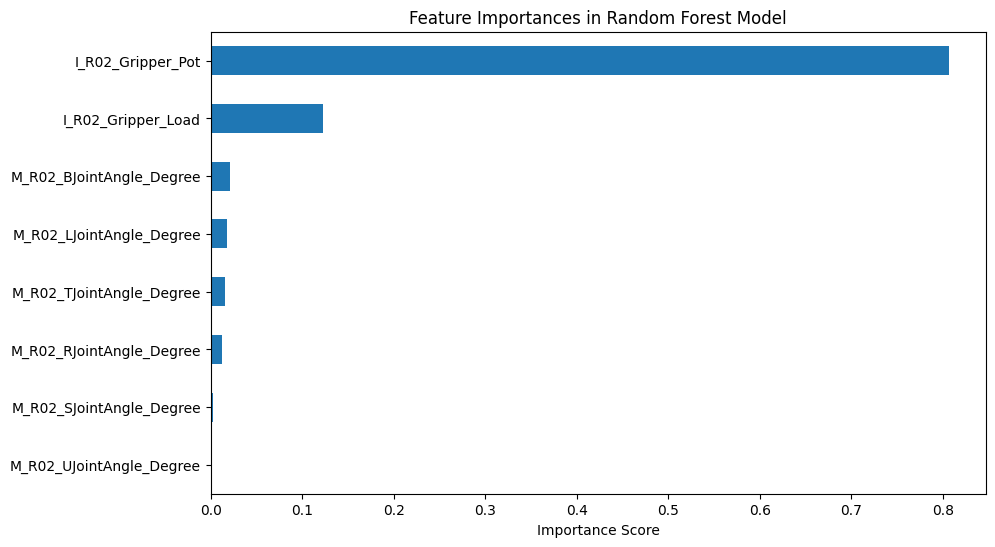

In [36]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance Score")
plt.show()